# 支持向量机 (Support Vector Machine)

## 学习目标
- 理解支持向量机的基本原理
- 掌握最大间隔分类器的概念
- 理解硬间隔与软间隔的区别
- 掌握核技巧(Kernel Trick)的原理和应用
- 使用不同核函数处理非线性问题
- 理解C和gamma参数的作用
- 使用GridSearchCV进行参数调优

**预计学习时间：** 3-3.5小时

---

## 1. 理论简介

### 1.1 什么是支持向量机？

支持向量机(SVM)是一种强大的监督学习算法，主要用于分类任务。

**核心思想：** 找到一个最优的超平面，使得两类样本之间的间隔(margin)最大化。

**支持向量：** 距离决策边界最近的那些样本点，它们支撑着决策边界。

---

### 1.2 最大间隔分类器

#### 决策函数

对于线性可分的数据，SVM寻找一个超平面：

$$w^Tx + b = 0$$

**分类规则：**
- 如果 $w^Tx + b \geq 1$，预测为正类 (+1)
- 如果 $w^Tx + b \leq -1$，预测为负类 (-1)

#### 间隔(Margin)

间隔定义为从决策边界到最近样本点的距离：

$$\text{margin} = \frac{2}{\|w\|}$$

**目标：** 最大化间隔，即最小化 $\|w\|$

---

### 1.3 硬间隔 vs 软间隔

#### 硬间隔 SVM (Hard Margin)

要求所有样本都被正确分类，且在间隔之外：

$$y_i(w^Tx_i + b) \geq 1, \quad \forall i$$

**问题：**
- 只适用于线性可分数据
- 对异常值(outliers)非常敏感

#### 软间隔 SVM (Soft Margin)

允许一些样本违反间隔约束，引入松弛变量 $\xi_i$：

$$y_i(w^Tx_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0$$

**目标函数：**

$$\min_{w,b,\xi} \frac{1}{2}\|w\|^2 + C\sum_{i=1}^{n}\xi_i$$

- **第一项**：最大化间隔
- **第二项**：惩罚错误分类
- **C参数**：控制两者之间的权衡
  - C大 → 更重视正确分类 → 可能过拟合
  - C小 → 更重视间隔最大化 → 可能欠拟合

---

### 1.4 核技巧 (Kernel Trick)

**问题：** 线性SVM只能处理线性可分的数据。

**解决方案：** 使用核函数将数据映射到高维空间，使其在高维空间中线性可分。

#### 核函数

核函数 $K(x_i, x_j)$ 计算两个样本在高维空间中的内积，无需显式计算映射。

**常用核函数：**

1. **线性核 (Linear)**
   $$K(x_i, x_j) = x_i^T x_j$$

2. **多项式核 (Polynomial)**
   $$K(x_i, x_j) = (\gamma x_i^T x_j + r)^d$$
   - $d$: 多项式次数
   - $\gamma$: 缩放系数

3. **RBF核 / 高斯核 (Radial Basis Function)**
   $$K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$$
   - $\gamma$: 控制高斯核的宽度
   - $\gamma$大 → 影响范围小 → 决策边界复杂
   - $\gamma$小 → 影响范围大 → 决策边界平滑

4. **Sigmoid核**
   $$K(x_i, x_j) = \tanh(\gamma x_i^T x_j + r)$$

---

### 1.5 SVM的优势

- ✅ 在高维空间中有效
- ✅ 适合特征数大于样本数的情况
- ✅ 只使用支持向量，内存高效
- ✅ 通过核函数处理非线性问题
- ✅ 泛化能力强

---

## 2. 导入必要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_circles, make_moons, load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# 设置随机种子
np.random.seed(42)

# 设置绘图风格
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['font.sans-serif'] = [
    'Arial Unicode MS',
    'PingFang SC',
    'STHeiti',
    'Heiti TC',
    'SimHei',
]
plt.rcParams['axes.unicode_minus'] = False

print('✓ 所有库导入成功')

✓ 所有库导入成功


## 3. 线性SVM

### 3.1 生成线性可分数据

数据形状: X=(100, 2), y=(100,)
类别分布: 类别0=50, 类别1=50


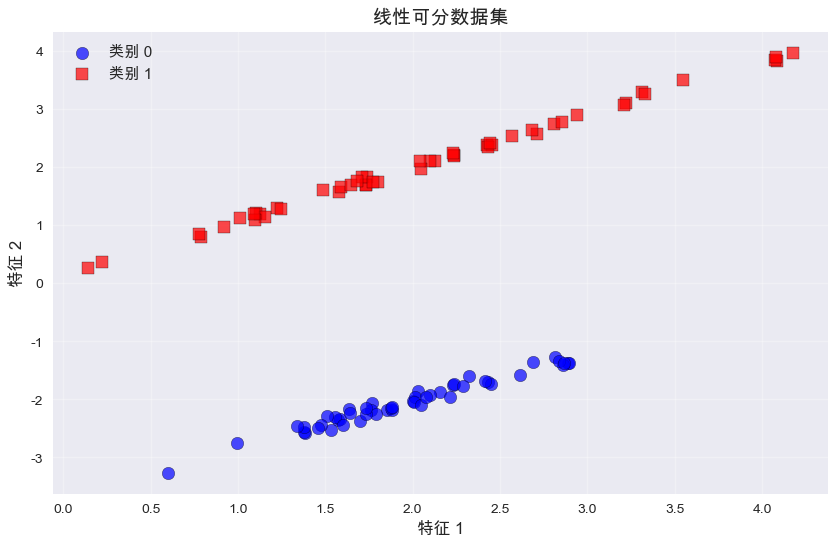

In [2]:
# 生成线性可分的数据
X_linear, y_linear = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2,
    random_state=42
)

print(f'数据形状: X={X_linear.shape}, y={y_linear.shape}')
print(f'类别分布: 类别0={np.sum(y_linear==0)}, 类别1={np.sum(y_linear==1)}')

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X_linear[y_linear==0][:, 0], X_linear[y_linear==0][:, 1],
            c='blue', marker='o', s=80, alpha=0.7, edgecolors='k', label='类别 0')
plt.scatter(X_linear[y_linear==1][:, 0], X_linear[y_linear==1][:, 1],
            c='red', marker='s', s=80, alpha=0.7, edgecolors='k', label='类别 1')
plt.xlabel('特征 1', fontsize=12)
plt.ylabel('特征 2', fontsize=12)
plt.title('线性可分数据集', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

### 3.2 训练线性SVM

In [3]:
# 创建线性SVM模型
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_linear, y_linear)

# 预测
y_pred = svm_linear.predict(X_linear)

# 评估
accuracy = accuracy_score(y_linear, y_pred)
print(f'训练集准确率: {accuracy:.4f}')

# 支持向量
print(f'\n支持向量数量: {len(svm_linear.support_vectors_)}')
print(f'支持向量索引: {svm_linear.support_}')
print(f'\n模型参数:')
print(f'  权重 w: {svm_linear.coef_}')
print(f'  偏置 b: {svm_linear.intercept_}')

训练集准确率: 1.0000

支持向量数量: 3
支持向量索引: [ 8 72 82]

模型参数:
  权重 w: [[-0.4487059   0.54945964]]
  偏置 b: [0.91771078]


### 3.3 可视化决策边界和支持向量

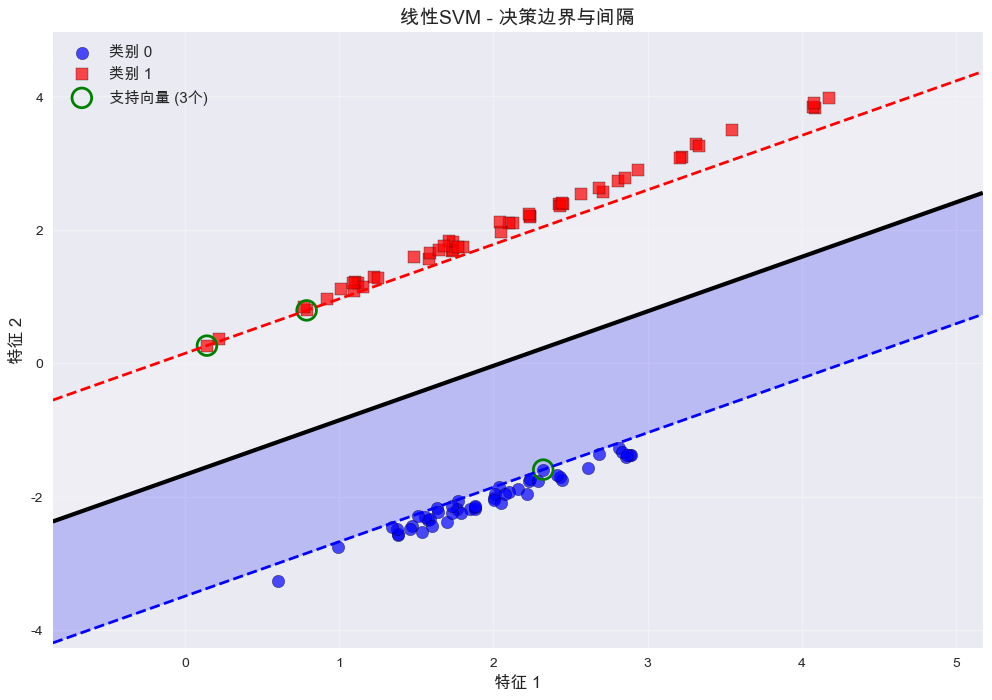


图例说明:
  - 黑色实线: 决策边界 (w^T x + b = 0)
  - 蓝色虚线: 负类间隔边界 (w^T x + b = -1)
  - 红色虚线: 正类间隔边界 (w^T x + b = 1)
  - 绿色圈: 支持向量
  - 间隔(margin) = 两条虚线之间的距离


In [4]:
def plot_svm_decision_boundary(model, X, y, title='SVM决策边界'):
    """绘制SVM决策边界和间隔"""
    # 创建网格
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # 预测
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘图
    plt.figure(figsize=(12, 8))
    
    # 绘制决策边界和间隔
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'white', 'red'])
    plt.contour(xx, yy, Z, levels=[-1], linewidths=2, linestyles='--', colors='blue')
    plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='black')
    plt.contour(xx, yy, Z, levels=[1], linewidths=2, linestyles='--', colors='red')
    
    # 绘制样本点
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],
                c='blue', marker='o', s=80, alpha=0.7, edgecolors='k', label='类别 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],
                c='red', marker='s', s=80, alpha=0.7, edgecolors='k', label='类别 1')
    
    # 标记支持向量
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=200, linewidth=2, facecolors='none', edgecolors='green',
                label=f'支持向量 ({len(model.support_vectors_)}个)')
    
    plt.xlabel('特征 1', fontsize=12)
    plt.ylabel('特征 2', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.show()

# 可视化
plot_svm_decision_boundary(svm_linear, X_linear, y_linear, 
                           title='线性SVM - 决策边界与间隔')

print('\n图例说明:')
print('  - 黑色实线: 决策边界 (w^T x + b = 0)')
print('  - 蓝色虚线: 负类间隔边界 (w^T x + b = -1)')
print('  - 红色虚线: 正类间隔边界 (w^T x + b = 1)')
print('  - 绿色圈: 支持向量')
print('  - 间隔(margin) = 两条虚线之间的距离')

### 3.4 C参数的影响

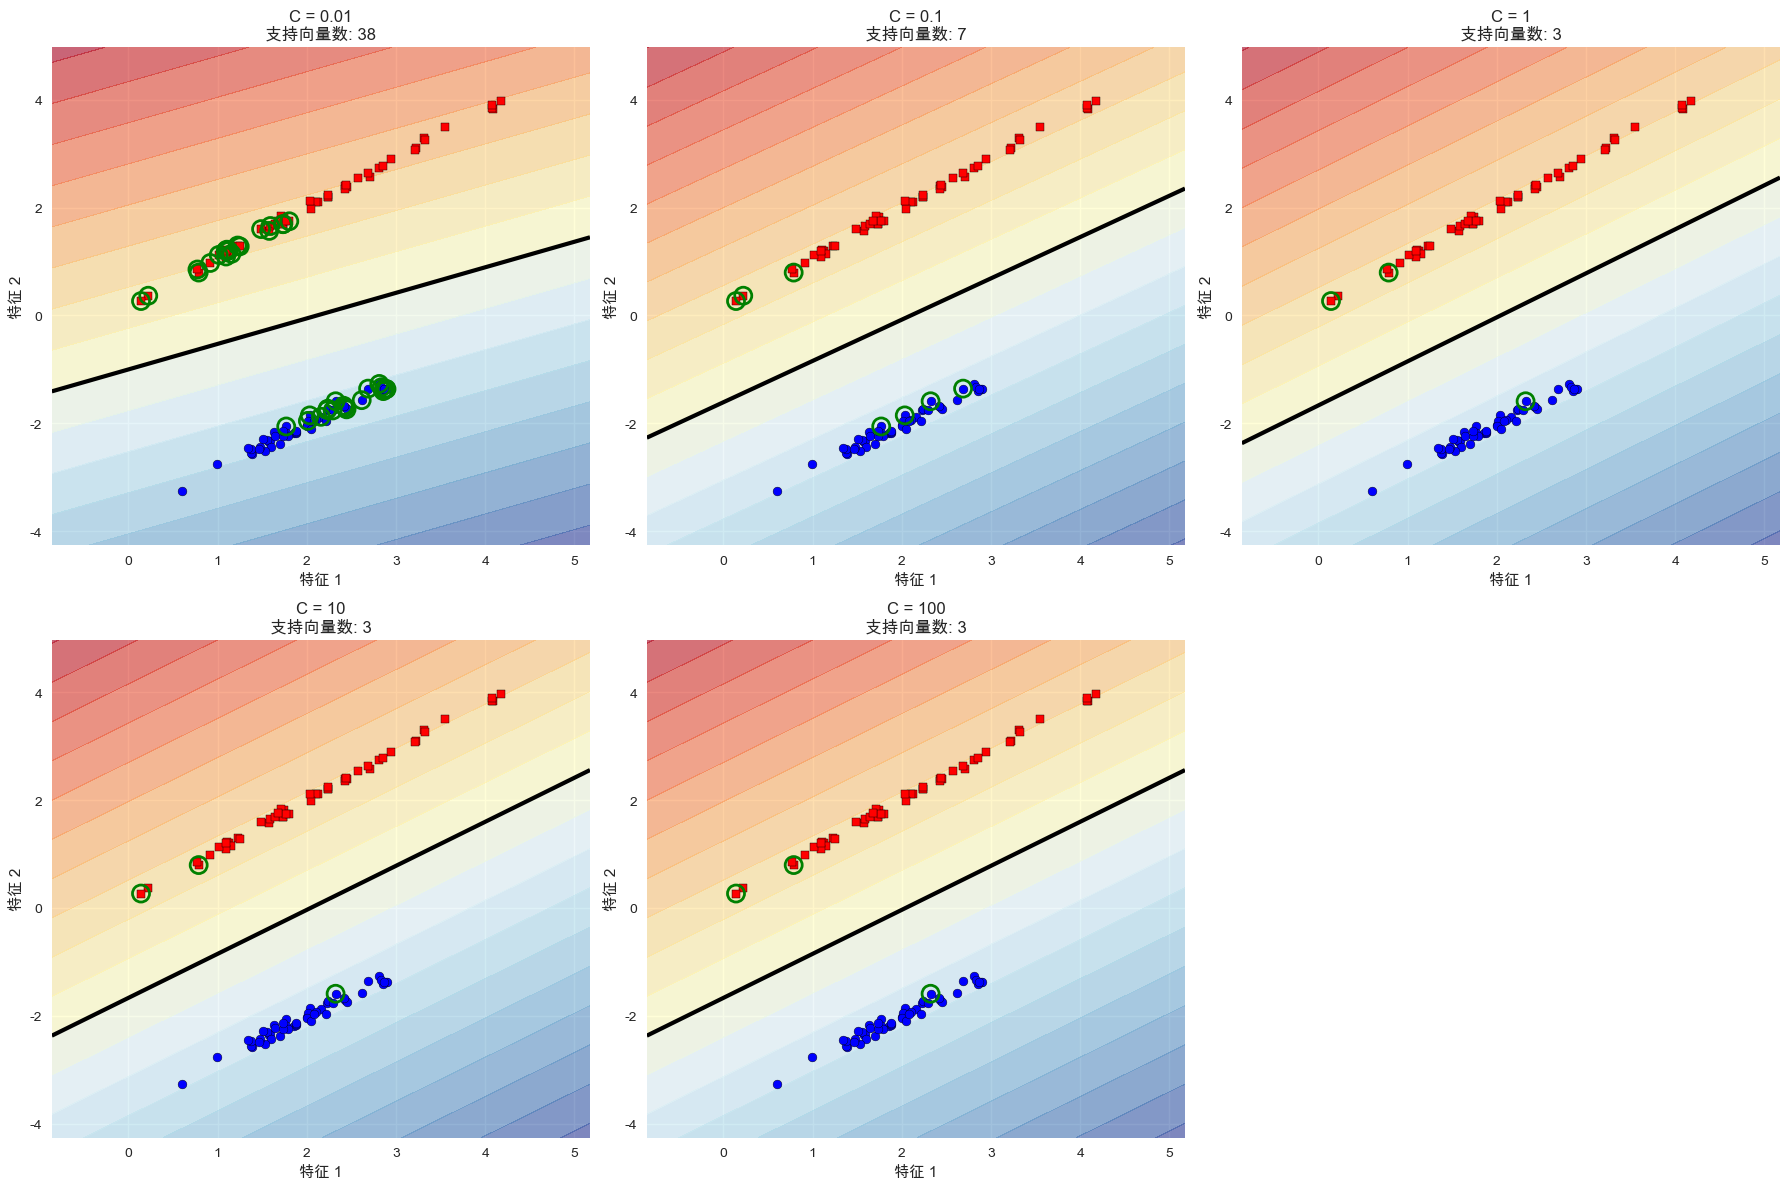


C参数的影响:
  - C小 → 容忍更多错误 → 间隔更大 → 支持向量更多 → 模型简单
  - C大 → 严格分类 → 间隔可能更小 → 支持向量更少 → 可能过拟合


In [7]:
# 测试不同的C值
C_values = [0.01, 0.1, 1, 10, 100]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, C in enumerate(C_values):
    # 训练模型
    model = SVC(kernel='linear', C=C, random_state=42)
    model.fit(X_linear, y_linear)
    
    # 创建网格
    x_min, x_max = X_linear[:, 0].min() - 1, X_linear[:, 0].max() + 1
    y_min, y_max = X_linear[:, 1].min() - 1, X_linear[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘图
    axes[i].contourf(xx, yy, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
    axes[i].contour(xx, yy, Z, levels=[0], linewidths=3, colors='black')
    axes[i].scatter(X_linear[y_linear==0][:, 0], X_linear[y_linear==0][:, 1],
                    c='blue', marker='o', s=40, edgecolors='k')
    axes[i].scatter(X_linear[y_linear==1][:, 0], X_linear[y_linear==1][:, 1],
                    c='red', marker='s', s=40, edgecolors='k')
    axes[i].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                    s=150, linewidth=2, facecolors='none', edgecolors='green')
    axes[i].set_title(f'C = {C}\n支持向量数: {len(model.support_vectors_)}', fontsize=12)
    axes[i].set_xlabel('特征 1')
    axes[i].set_ylabel('特征 2')

# 删除多余的子图
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print('\nC参数的影响:')
print('  - C小 → 容忍更多错误 → 间隔更大 → 支持向量更多 → 模型简单')
print('  - C大 → 严格分类 → 间隔可能更小 → 支持向量更少 → 可能过拟合')

## 4. 非线性SVM - 核技巧

### 4.1 圆形数据集 (make_circles)

圆形数据形状: X=(200, 2), y=(200,)


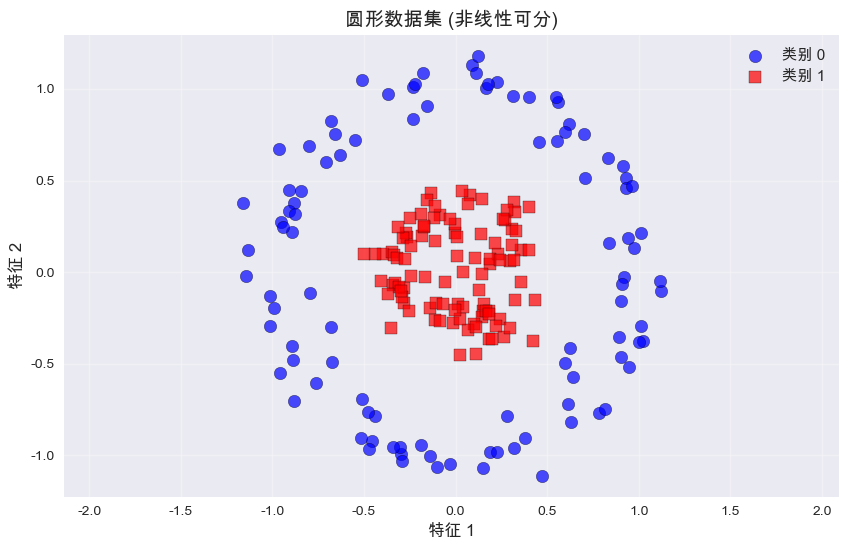


这个数据集是非线性可分的，线性SVM无法很好地分类。


In [8]:
# 生成圆形数据
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)

print(f'圆形数据形状: X={X_circles.shape}, y={y_circles.shape}')

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X_circles[y_circles==0][:, 0], X_circles[y_circles==0][:, 1],
            c='blue', marker='o', s=80, alpha=0.7, edgecolors='k', label='类别 0')
plt.scatter(X_circles[y_circles==1][:, 0], X_circles[y_circles==1][:, 1],
            c='red', marker='s', s=80, alpha=0.7, edgecolors='k', label='类别 1')
plt.xlabel('特征 1', fontsize=12)
plt.ylabel('特征 2', fontsize=12)
plt.title('圆形数据集 (非线性可分)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print('\n这个数据集是非线性可分的，线性SVM无法很好地分类。')

### 4.2 对比不同核函数

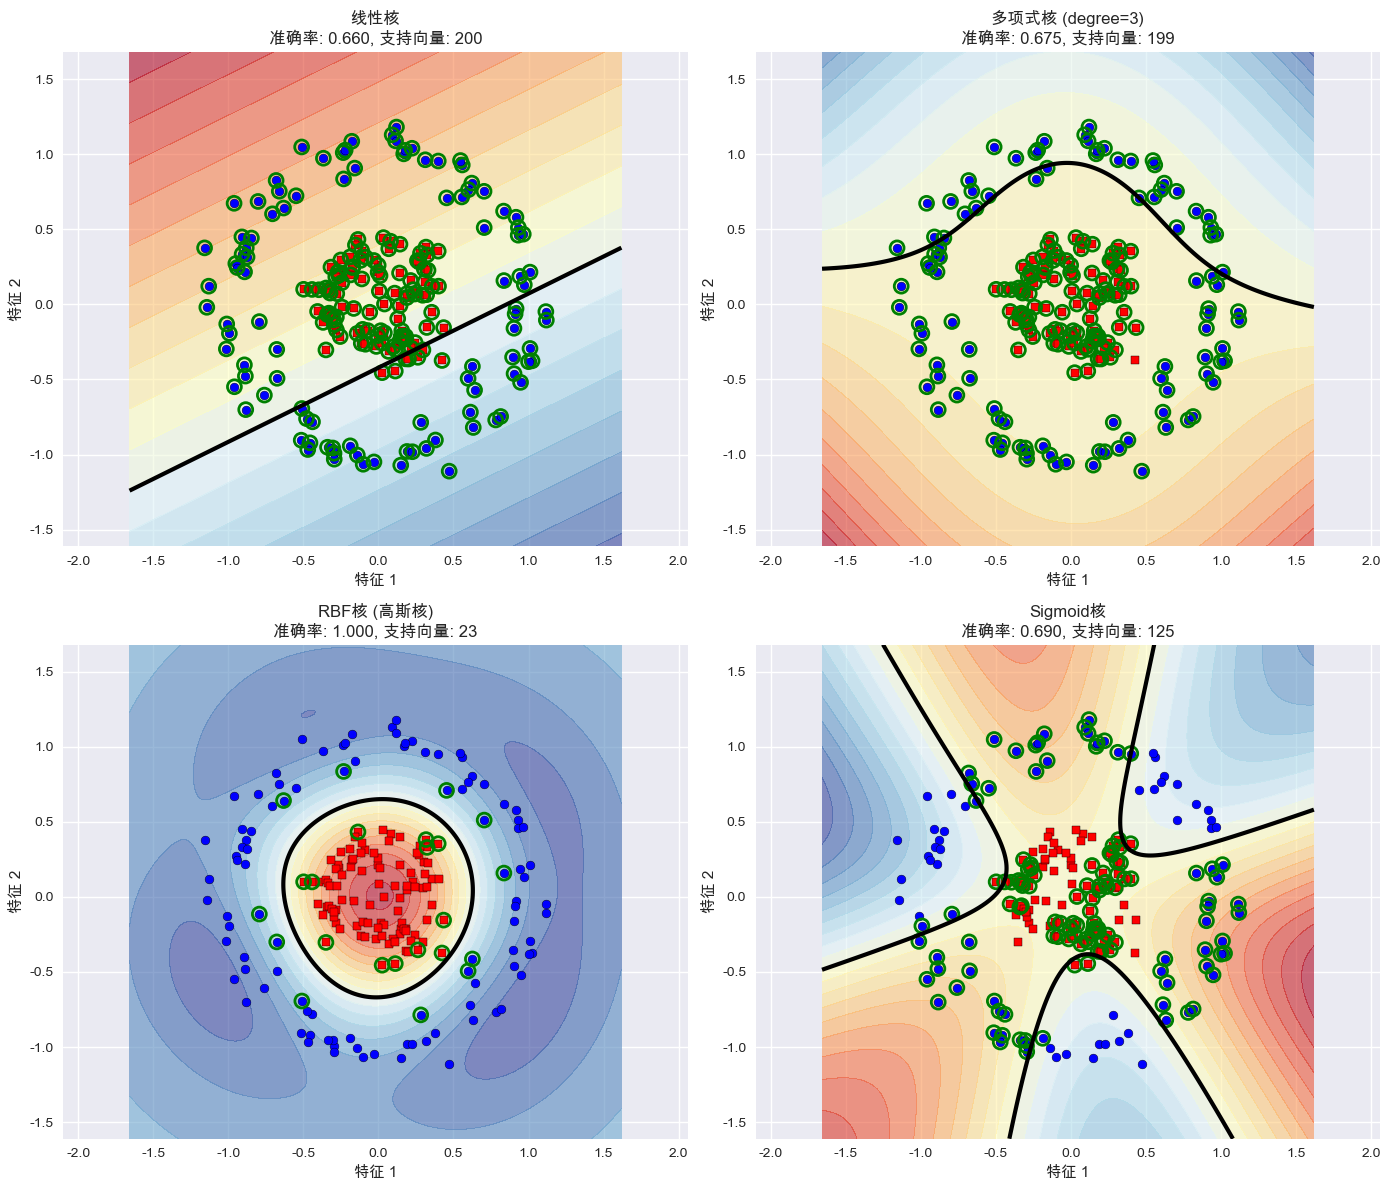


结论:
  - 线性核: 无法处理非线性数据
  - 多项式核: 可以处理，但决策边界可能不够光滑
  - RBF核: 表现最好，决策边界光滑
  - Sigmoid核: 性能一般


In [11]:
# 测试不同的核函数
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_names = ['线性核', '多项式核 (degree=3)', 'RBF核 (高斯核)', 'Sigmoid核']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (kernel, name) in enumerate(zip(kernels, kernel_names)):
    # 训练模型
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, C=1, random_state=42)
    else:
        model = SVC(kernel=kernel, C=1, random_state=42)
    
    model.fit(X_circles, y_circles)
    
    # 预测准确率
    accuracy = model.score(X_circles, y_circles)
    
    # 创建网格
    x_min, x_max = X_circles[:, 0].min() - 0.5, X_circles[:, 0].max() + 0.5
    y_min, y_max = X_circles[:, 1].min() - 0.5, X_circles[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘图
    axes[i].contourf(xx, yy, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
    axes[i].contour(xx, yy, Z, levels=[0], linewidths=3, colors='black')
    axes[i].scatter(X_circles[y_circles==0][:, 0], X_circles[y_circles==0][:, 1],
                    c='blue', marker='o', s=40, edgecolors='k')
    axes[i].scatter(X_circles[y_circles==1][:, 0], X_circles[y_circles==1][:, 1],
                    c='red', marker='s', s=40, edgecolors='k')
    axes[i].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                    s=100, linewidth=2, facecolors='none', edgecolors='green')
    axes[i].set_title(f'{name}\n准确率: {accuracy:.3f}, 支持向量: {len(model.support_vectors_)}',
                      fontsize=12)
    axes[i].set_xlabel('特征 1')
    axes[i].set_ylabel('特征 2')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

print('\n结论:')
print('  - 线性核: 无法处理非线性数据')
print('  - 多项式核: 可以处理，但决策边界可能不够光滑')
print('  - RBF核: 表现最好，决策边界光滑')
print('  - Sigmoid核: 性能一般')

### 4.3 月牙形数据集 (make_moons)

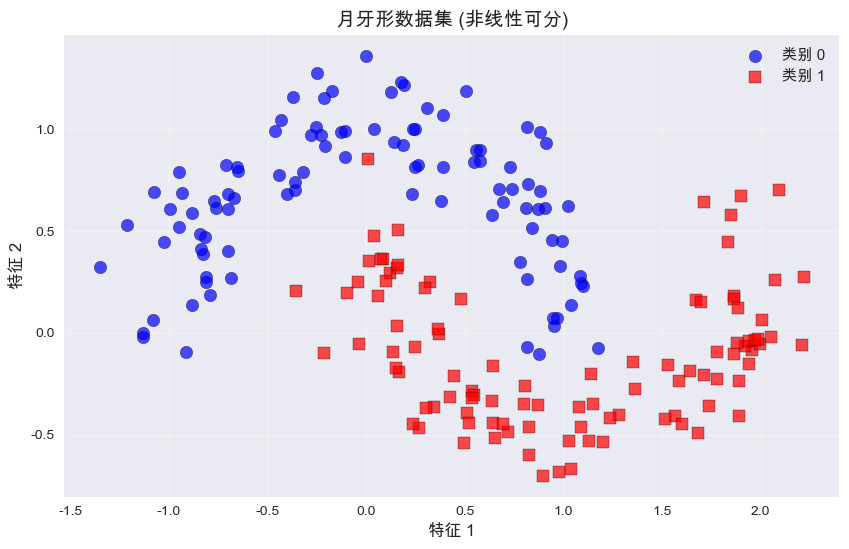

In [12]:
# 生成月牙形数据
X_moons, y_moons = make_moons(n_samples=200, noise=0.15, random_state=42)

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X_moons[y_moons==0][:, 0], X_moons[y_moons==0][:, 1],
            c='blue', marker='o', s=80, alpha=0.7, edgecolors='k', label='类别 0')
plt.scatter(X_moons[y_moons==1][:, 0], X_moons[y_moons==1][:, 1],
            c='red', marker='s', s=80, alpha=0.7, edgecolors='k', label='类别 1')
plt.xlabel('特征 1', fontsize=12)
plt.ylabel('特征 2', fontsize=12)
plt.title('月牙形数据集 (非线性可分)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

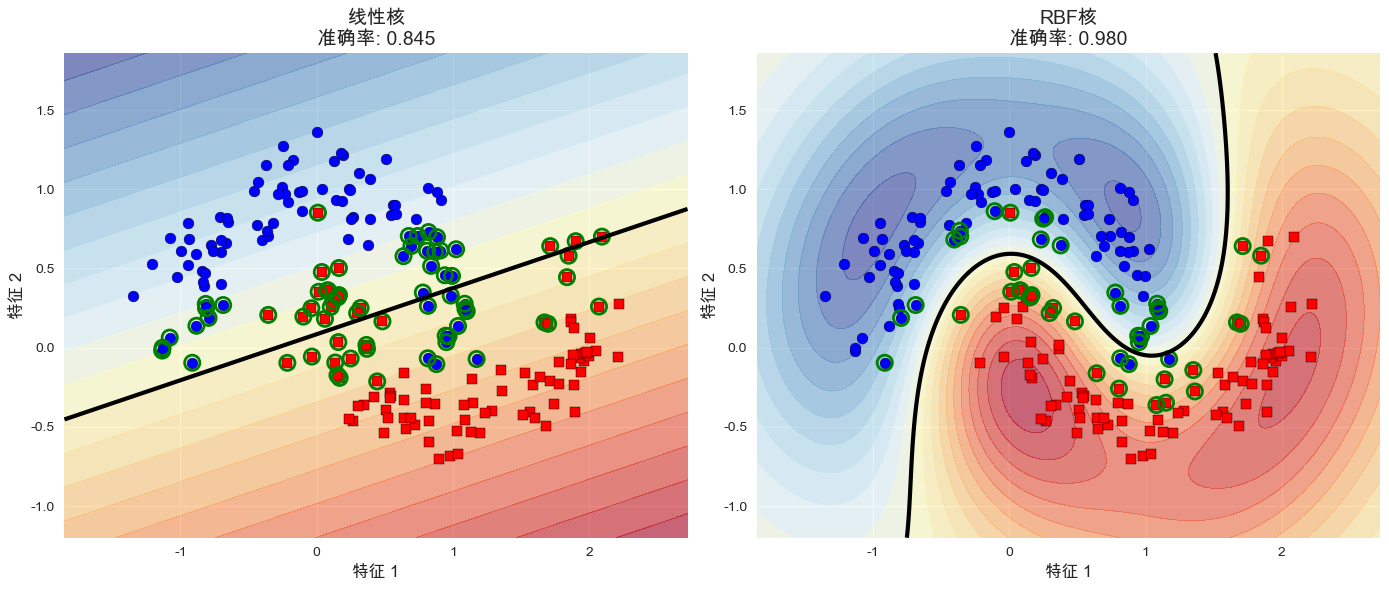

In [13]:
# 对比线性核和RBF核
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, kernel in enumerate(['linear', 'rbf']):
    model = SVC(kernel=kernel, C=1, random_state=42)
    model.fit(X_moons, y_moons)
    accuracy = model.score(X_moons, y_moons)
    
    # 创建网格
    x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
    y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘图
    axes[i].contourf(xx, yy, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
    axes[i].contour(xx, yy, Z, levels=[0], linewidths=3, colors='black')
    axes[i].scatter(X_moons[y_moons==0][:, 0], X_moons[y_moons==0][:, 1],
                    c='blue', marker='o', s=60, edgecolors='k')
    axes[i].scatter(X_moons[y_moons==1][:, 0], X_moons[y_moons==1][:, 1],
                    c='red', marker='s', s=60, edgecolors='k')
    axes[i].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                    s=120, linewidth=2, facecolors='none', edgecolors='green')
    
    kernel_name = '线性核' if kernel == 'linear' else 'RBF核'
    axes[i].set_title(f'{kernel_name}\n准确率: {accuracy:.3f}', fontsize=14)
    axes[i].set_xlabel('特征 1', fontsize=12)
    axes[i].set_ylabel('特征 2', fontsize=12)

plt.tight_layout()
plt.show()

### 4.4 RBF核的gamma参数

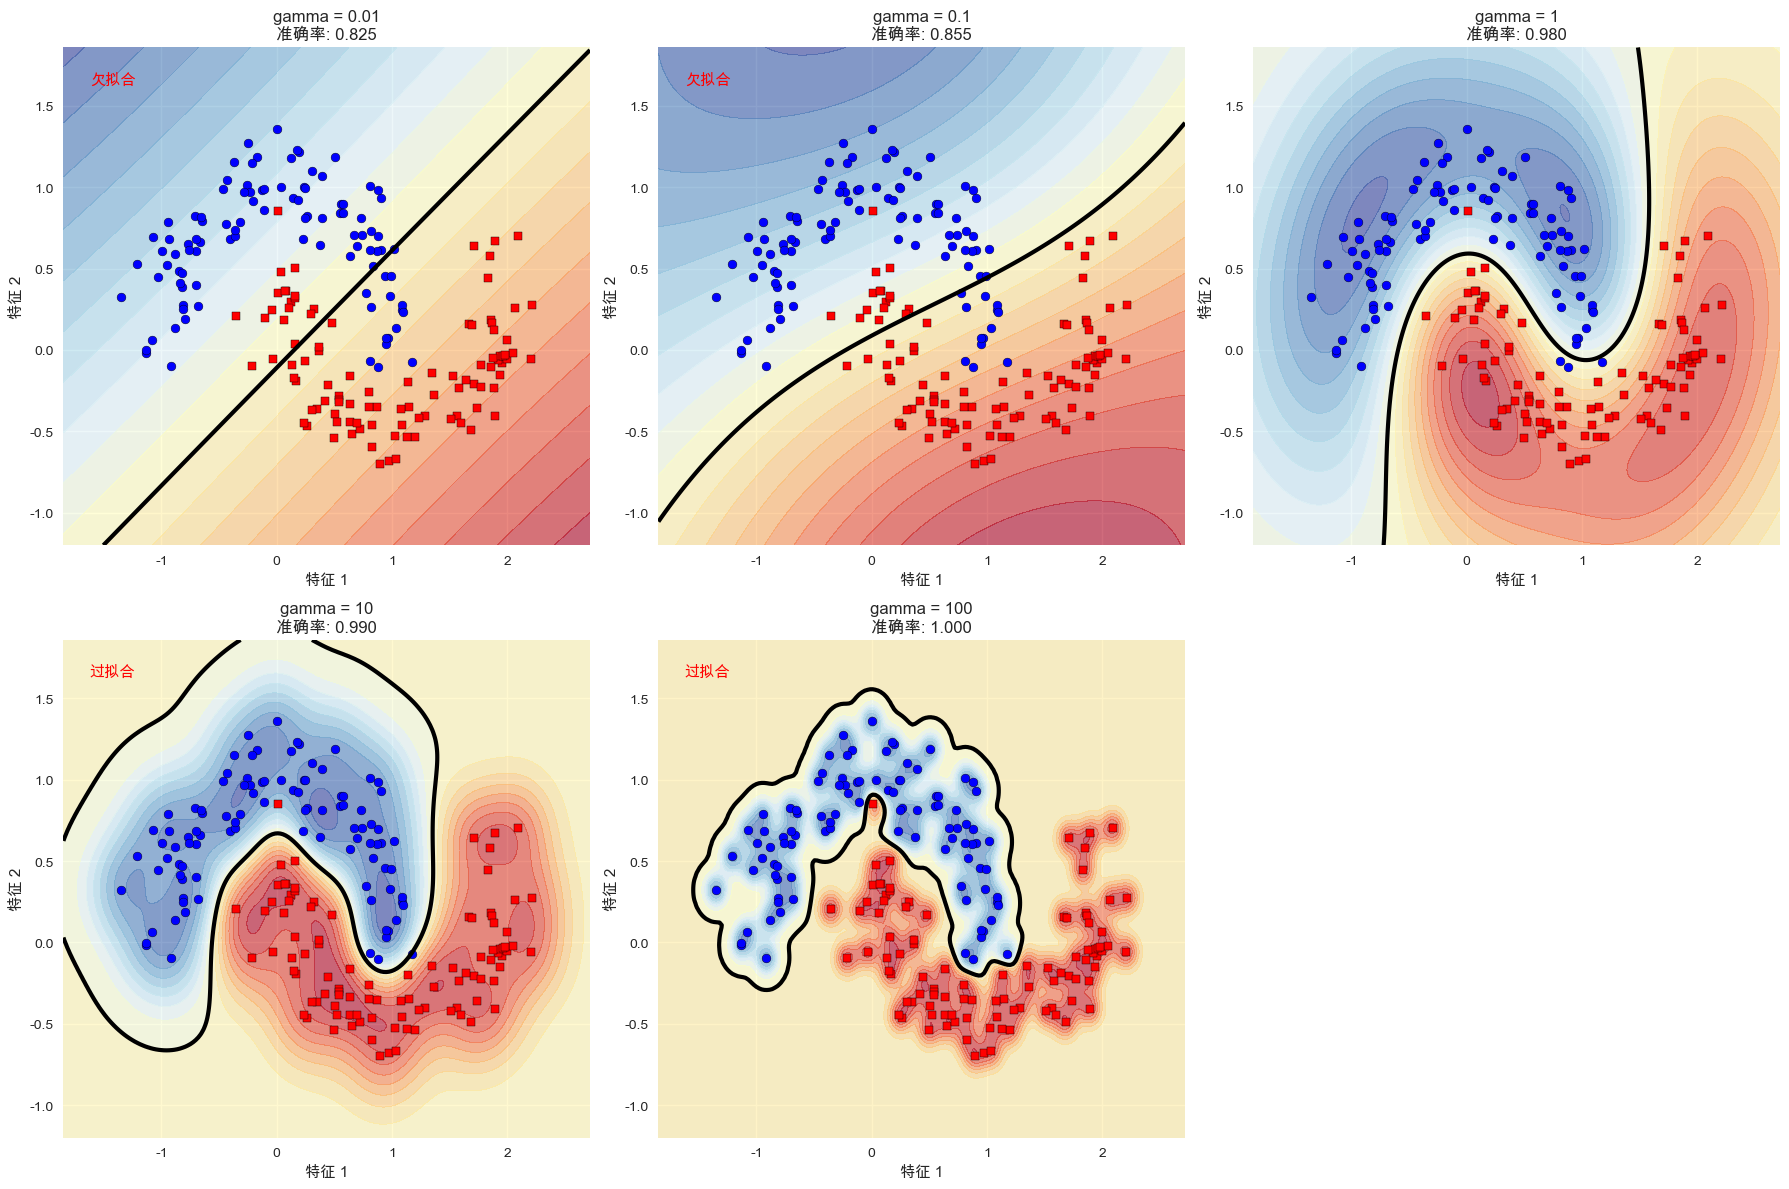


gamma参数的影响:
  - gamma小 → 影响范围大 → 决策边界平滑 → 可能欠拟合
  - gamma大 → 影响范围小 → 决策边界复杂 → 可能过拟合
  - 需要通过交叉验证选择最佳gamma值


In [14]:
# 测试不同的gamma值
gamma_values = [0.01, 0.1, 1, 10, 100]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, gamma in enumerate(gamma_values):
    model = SVC(kernel='rbf', gamma=gamma, C=1, random_state=42)
    model.fit(X_moons, y_moons)
    accuracy = model.score(X_moons, y_moons)
    
    # 创建网格
    x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
    y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘图
    axes[i].contourf(xx, yy, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
    axes[i].contour(xx, yy, Z, levels=[0], linewidths=3, colors='black')
    axes[i].scatter(X_moons[y_moons==0][:, 0], X_moons[y_moons==0][:, 1],
                    c='blue', marker='o', s=40, edgecolors='k')
    axes[i].scatter(X_moons[y_moons==1][:, 0], X_moons[y_moons==1][:, 1],
                    c='red', marker='s', s=40, edgecolors='k')
    axes[i].set_title(f'gamma = {gamma}\n准确率: {accuracy:.3f}', fontsize=12)
    axes[i].set_xlabel('特征 1')
    axes[i].set_ylabel('特征 2')
    
    # 标注过拟合/欠拟合
    if gamma <= 0.1:
        axes[i].text(0.05, 0.95, '欠拟合', transform=axes[i].transAxes,
                     fontsize=11, color='red', verticalalignment='top')
    elif gamma >= 10:
        axes[i].text(0.05, 0.95, '过拟合', transform=axes[i].transAxes,
                     fontsize=11, color='red', verticalalignment='top')

# 删除多余的子图
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print('\ngamma参数的影响:')
print('  - gamma小 → 影响范围大 → 决策边界平滑 → 可能欠拟合')
print('  - gamma大 → 影响范围小 → 决策边界复杂 → 可能过拟合')
print('  - 需要通过交叉验证选择最佳gamma值')

### 4.5 C和gamma的联合影响

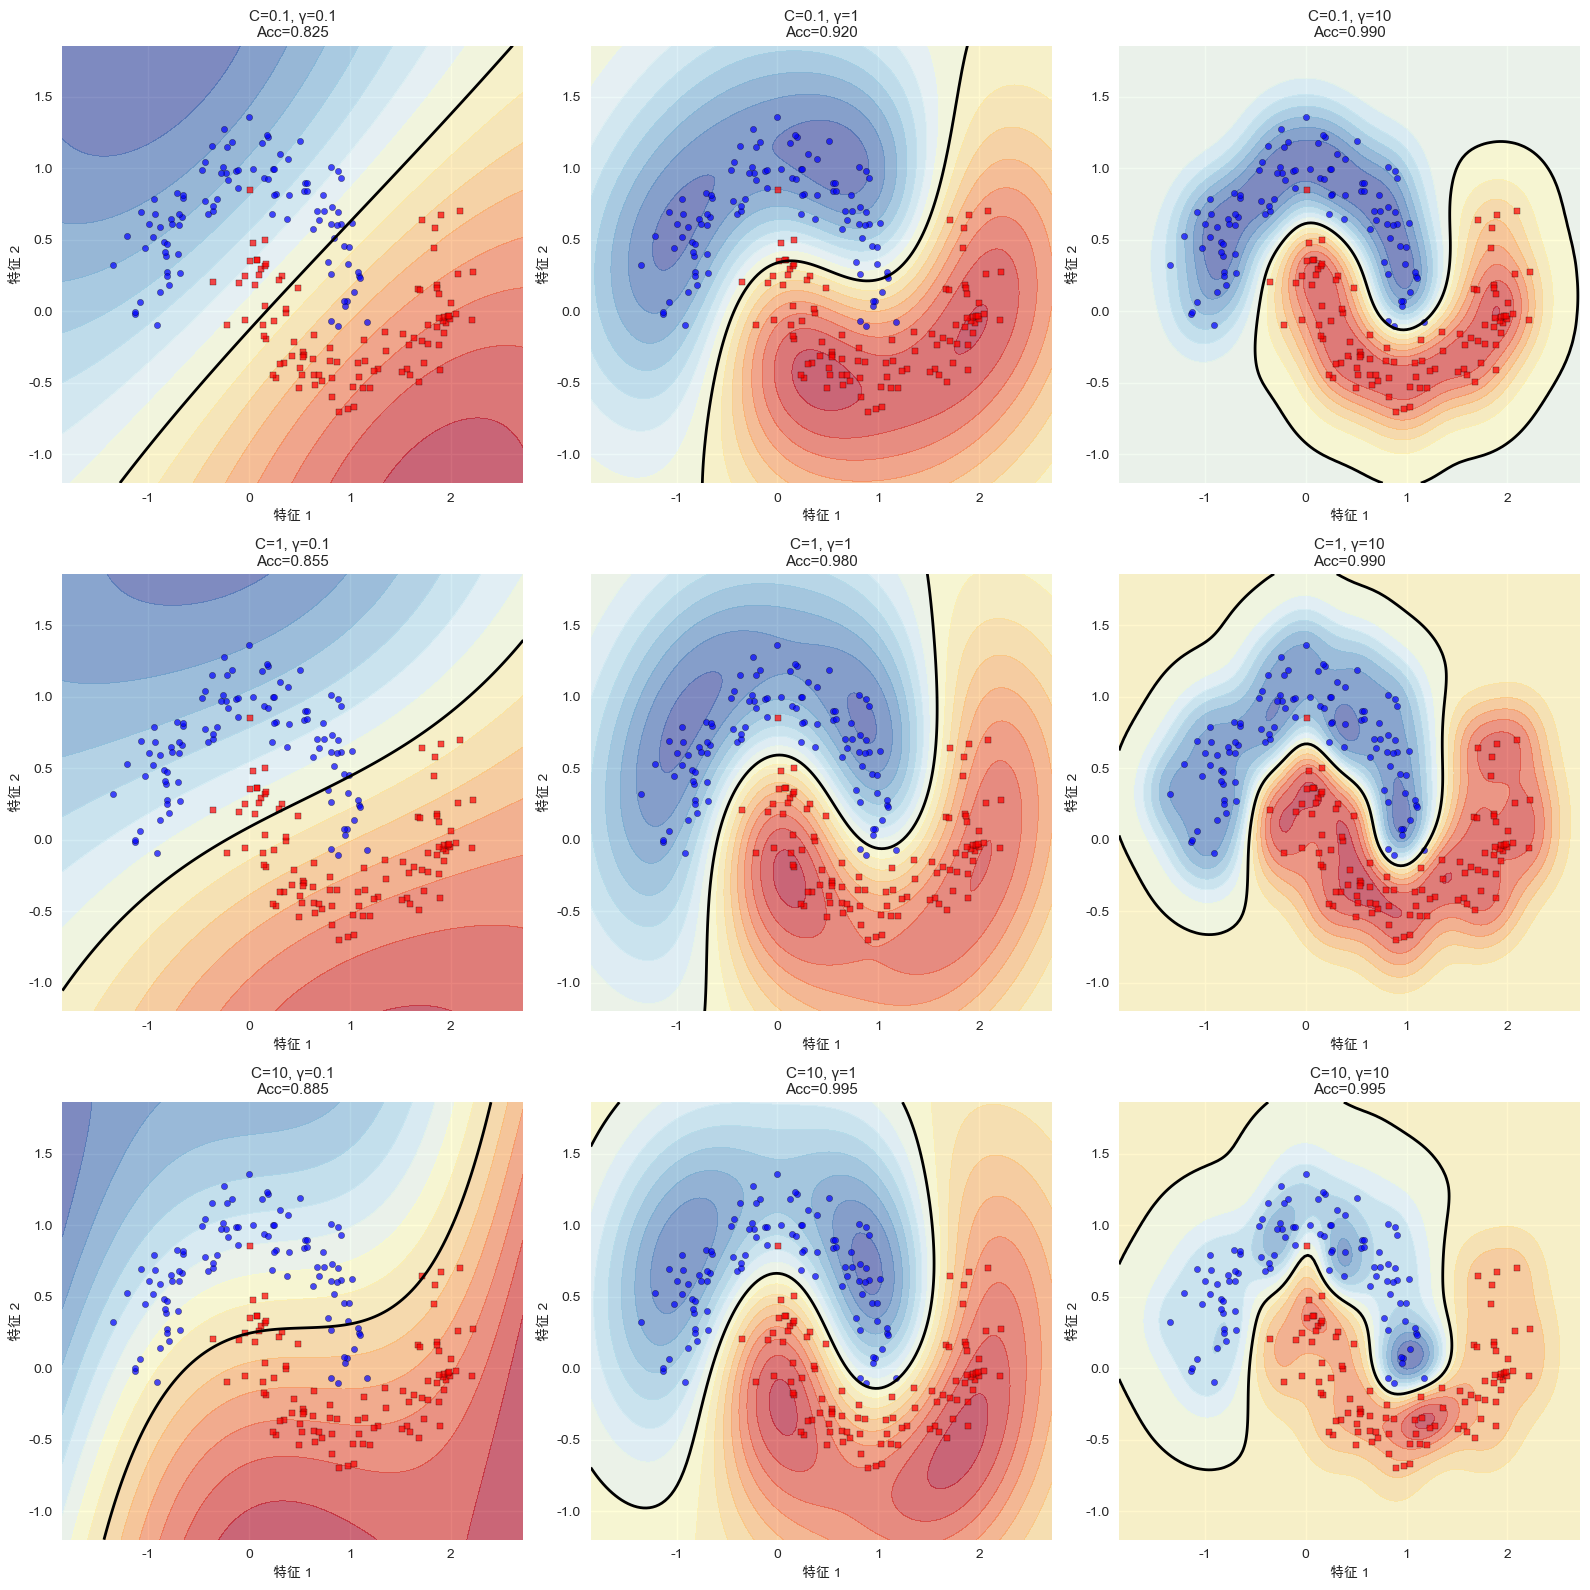


C和gamma的联合影响:
  - 左上角(C小, γ小): 欠拟合，决策边界过于简单
  - 右下角(C大, γ大): 过拟合，决策边界过于复杂
  - 对角线附近: 可能找到较好的平衡


In [15]:
# 测试C和gamma的组合
C_range = [0.1, 1, 10]
gamma_range = [0.1, 1, 10]

fig, axes = plt.subplots(3, 3, figsize=(16, 16))

for i, C in enumerate(C_range):
    for j, gamma in enumerate(gamma_range):
        model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        model.fit(X_moons, y_moons)
        accuracy = model.score(X_moons, y_moons)
        
        # 创建网格
        x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
        y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150),
                             np.linspace(y_min, y_max, 150))
        
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # 绘图
        axes[i, j].contourf(xx, yy, Z, levels=15, cmap='RdYlBu_r', alpha=0.6)
        axes[i, j].contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
        axes[i, j].scatter(X_moons[y_moons==0][:, 0], X_moons[y_moons==0][:, 1],
                          c='blue', marker='o', s=20, edgecolors='k', alpha=0.7)
        axes[i, j].scatter(X_moons[y_moons==1][:, 0], X_moons[y_moons==1][:, 1],
                          c='red', marker='s', s=20, edgecolors='k', alpha=0.7)
        axes[i, j].set_title(f'C={C}, γ={gamma}\nAcc={accuracy:.3f}', fontsize=11)
        axes[i, j].set_xlabel('特征 1', fontsize=10)
        axes[i, j].set_ylabel('特征 2', fontsize=10)

plt.tight_layout()
plt.show()

print('\nC和gamma的联合影响:')
print('  - 左上角(C小, γ小): 欠拟合，决策边界过于简单')
print('  - 右下角(C大, γ大): 过拟合，决策边界过于复杂')
print('  - 对角线附近: 可能找到较好的平衡')

## 5. 参数调优 - GridSearchCV

### 5.1 使用GridSearchCV寻找最佳参数

In [16]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42, stratify=y_moons
)

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# 创建GridSearchCV
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,              # 5折交叉验证
    scoring='accuracy',
    verbose=1,
    n_jobs=-1          # 使用所有CPU核心
)

# 训练
print('开始网格搜索...')
grid_search.fit(X_train, y_train)

# 最佳参数
print(f'\n最佳参数: {grid_search.best_params_}')
print(f'最佳交叉验证得分: {grid_search.best_score_:.4f}')

# 在测试集上评估
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f'测试集准确率: {test_score:.4f}')

开始网格搜索...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

最佳参数: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
最佳交叉验证得分: 0.9812
测试集准确率: 0.9750


### 5.2 可视化参数搜索结果

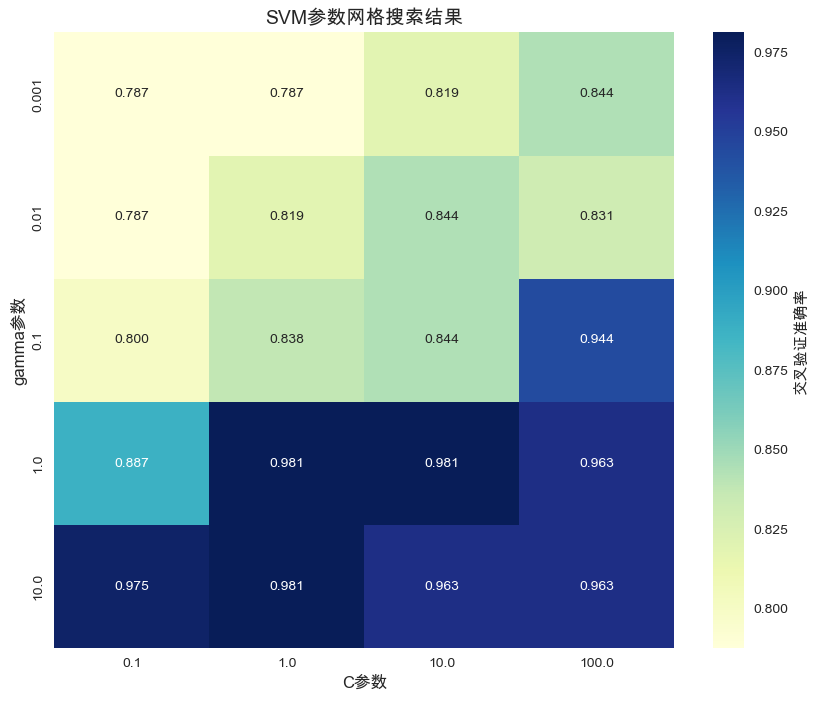


热图解读:
  - 颜色越深，准确率越高
  - 可以看到C和gamma的最佳组合
  - 避免选择导致过拟合的参数组合


In [17]:
# 提取结果
results = pd.DataFrame(grid_search.cv_results_)

# 创建透视表
pivot_table = results.pivot_table(
    values='mean_test_score',
    index='param_gamma',
    columns='param_C'
)

# 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlGnBu',
            cbar_kws={'label': '交叉验证准确率'})
plt.xlabel('C参数', fontsize=12)
plt.ylabel('gamma参数', fontsize=12)
plt.title('SVM参数网格搜索结果', fontsize=14)
plt.show()

print('\n热图解读:')
print('  - 颜色越深，准确率越高')
print('  - 可以看到C和gamma的最佳组合')
print('  - 避免选择导致过拟合的参数组合')

### 5.3 可视化最佳模型

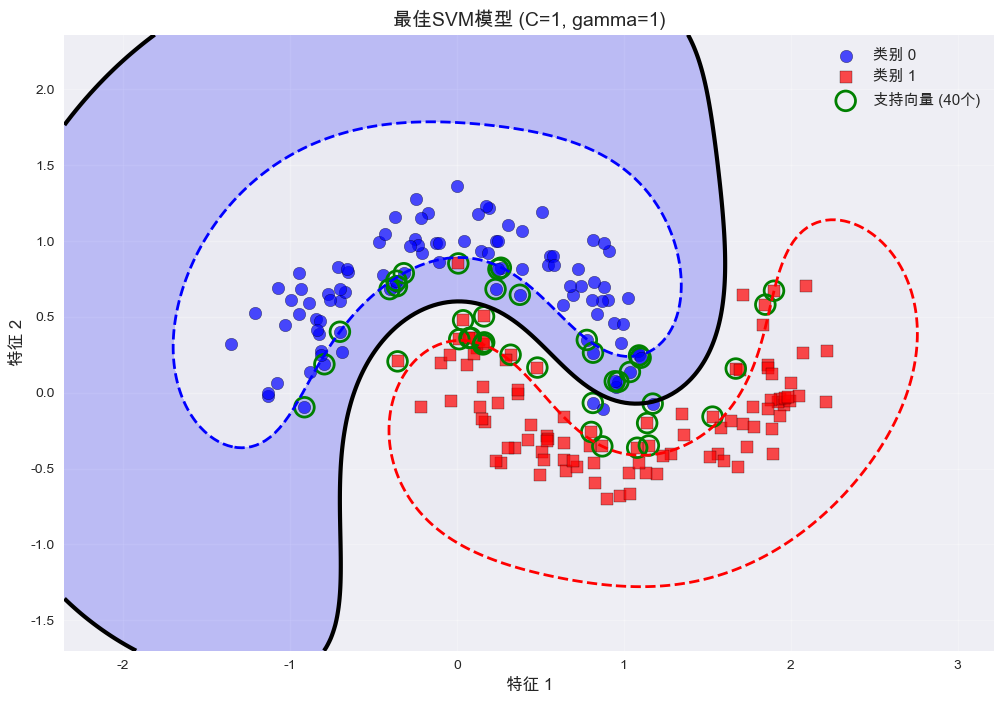

In [18]:
# 可视化最佳模型的决策边界
plot_svm_decision_boundary(best_model, X_moons, y_moons,
                           title=f'最佳SVM模型 (C={grid_search.best_params_["C"]}, gamma={grid_search.best_params_["gamma"]})')

## 6. 实战练习

### 6.1 数据集: 手写数字识别 (Digits)

手写数字数据集:
  样本数量: 1797
  特征数量: 64 (8×8像素图像)
  类别数量: 10
  类别: [0 1 2 3 4 5 6 7 8 9]


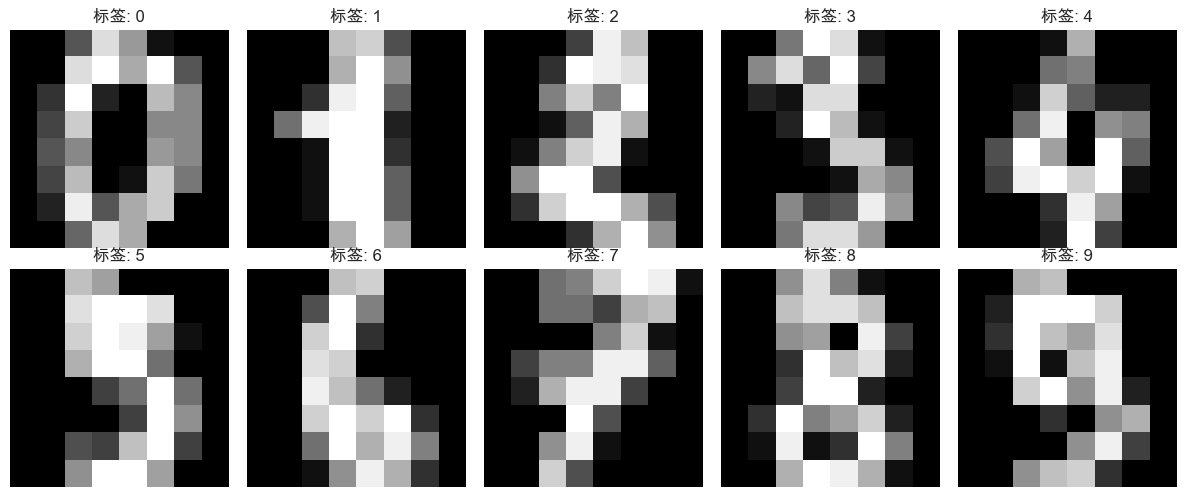

In [19]:
# 加载手写数字数据集
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print('手写数字数据集:')
print(f'  样本数量: {len(X_digits)}')
print(f'  特征数量: {X_digits.shape[1]} (8×8像素图像)')
print(f'  类别数量: {len(np.unique(y_digits))}')
print(f'  类别: {np.unique(y_digits)}')

# 可视化一些样本
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'标签: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [20]:
# 划分数据集
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(
    X_digits, y_digits, test_size=0.2, random_state=42, stratify=y_digits
)

# 特征标准化
scaler = StandardScaler()
X_train_digits_scaled = scaler.fit_transform(X_train_digits)
X_test_digits_scaled = scaler.transform(X_test_digits)

print(f'训练集: {X_train_digits.shape}')
print(f'测试集: {X_test_digits.shape}')

训练集: (1437, 64)
测试集: (360, 64)


In [21]:
# 训练SVM模型（使用默认参数）
svm_digits = SVC(kernel='rbf', random_state=42)
svm_digits.fit(X_train_digits_scaled, y_train_digits)

# 预测
y_train_pred_digits = svm_digits.predict(X_train_digits_scaled)
y_test_pred_digits = svm_digits.predict(X_test_digits_scaled)

# 评估
train_accuracy = accuracy_score(y_train_digits, y_train_pred_digits)
test_accuracy = accuracy_score(y_test_digits, y_test_pred_digits)

print('SVM手写数字识别结果（默认参数）:')
print(f'  训练集准确率: {train_accuracy:.4f}')
print(f'  测试集准确率: {test_accuracy:.4f}')

print('\n分类报告:')
print(classification_report(y_test_digits, y_test_pred_digits))

SVM手写数字识别结果（默认参数）:
  训练集准确率: 0.9972
  测试集准确率: 0.9750

分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.92      0.97      0.95        36
           8       1.00      0.91      0.96        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



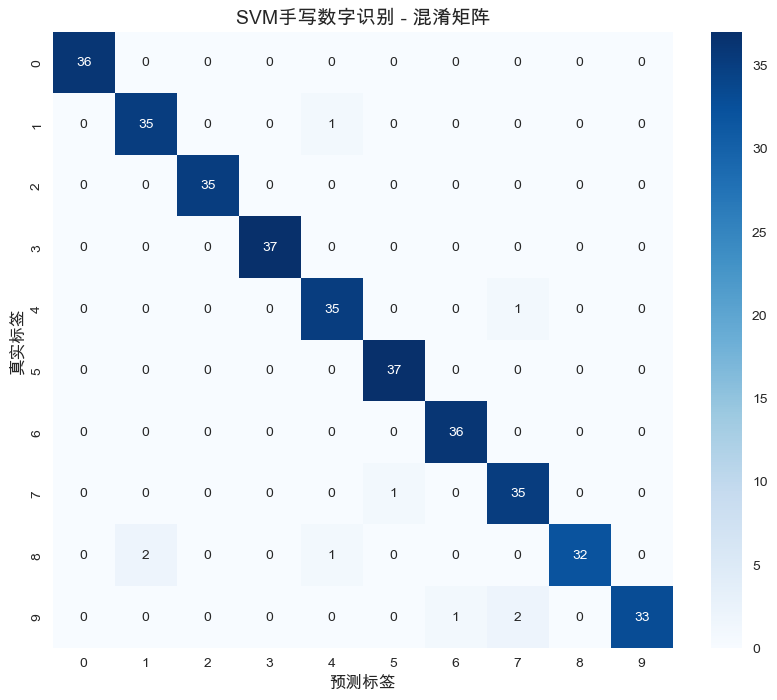

In [22]:
# 混淆矩阵
cm = confusion_matrix(y_test_digits, y_test_pred_digits)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.xlabel('预测标签', fontsize=12)
plt.ylabel('真实标签', fontsize=12)
plt.title('SVM手写数字识别 - 混淆矩阵', fontsize=14)
plt.show()

### 6.2 参数调优

In [23]:
# 定义参数网格
param_grid_digits = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
}

# GridSearchCV
grid_digits = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid_digits,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

print('开始参数搜索...')
grid_digits.fit(X_train_digits_scaled, y_train_digits)

print(f'\n最佳参数: {grid_digits.best_params_}')
print(f'最佳交叉验证得分: {grid_digits.best_score_:.4f}')

# 在测试集上评估
best_svm_digits = grid_digits.best_estimator_
test_score_digits = best_svm_digits.score(X_test_digits_scaled, y_test_digits)
print(f'测试集准确率: {test_score_digits:.4f}')

开始参数搜索...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

最佳参数: {'C': 10, 'gamma': 0.01}
最佳交叉验证得分: 0.9812
测试集准确率: 0.9833


### 6.3 错误分析

错误分类的样本数: 6/360


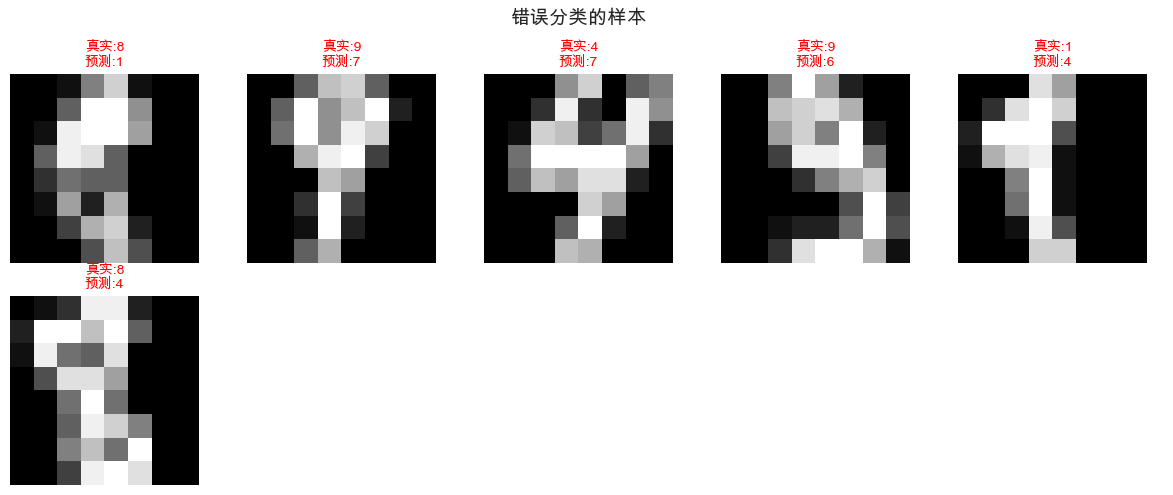

In [24]:
# 找出预测错误的样本
y_pred_best = best_svm_digits.predict(X_test_digits_scaled)
errors = y_test_digits != y_pred_best
error_indices = np.where(errors)[0]

print(f'错误分类的样本数: {len(error_indices)}/{len(y_test_digits)}')

# 可视化一些错误样本
if len(error_indices) > 0:
    n_errors = min(10, len(error_indices))
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        if i < n_errors:
            idx = error_indices[i]
            # 获取原始索引
            original_idx = X_test_digits.shape[0] - len(error_indices) + i
            # 重新reshape为8x8
            image = X_test_digits[idx].reshape(8, 8)
            ax.imshow(image, cmap='gray')
            ax.set_title(f'真实:{y_test_digits[idx]}\n预测:{y_pred_best[idx]}',
                        fontsize=10, color='red')
            ax.axis('off')
        else:
            ax.axis('off')
    plt.suptitle('错误分类的样本', fontsize=14)
    plt.tight_layout()
    plt.show()

### 6.4 SVM vs 逻辑回归对比

In [27]:
from sklearn.linear_model import LogisticRegression
import time

# 逻辑回归
print('训练逻辑回归...')
start_time = time.time()
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_digits_scaled, y_train_digits)
lr_time = time.time() - start_time
lr_score = lr.score(X_test_digits_scaled, y_test_digits)

# SVM (最佳参数)
print('训练SVM...')
start_time = time.time()
svm_time = time.time() - start_time
svm_score = test_score_digits

# 对比
print('\n' + '='*60)
print('逻辑回归 vs SVM 对比')
print('='*60)
print("{:<20} {:>15} {:>15}".format("指标", "逻辑回归", "SVM"))
print('-'*60)
print("{:<20} {:>15.4f} {:>15.4f}".format("测试集准确率", lr_score, svm_score))
print("{:<20} {:>15.4f} {:>15.4f}".format("训练时间(秒)", lr_time, svm_time))
print('='*60)

print('\n结论:')
if svm_score > lr_score:
    print(f'  - SVM准确率更高 (+{(svm_score-lr_score)*100:.2f}%)')
else:
    print(f'  - 逻辑回归准确率更高 (+{(lr_score-svm_score)*100:.2f}%)')

if lr_time < svm_time:
    print(f'  - 逻辑回归训练更快 ({svm_time/lr_time:.1f}x)')
else:
    print(f'  - SVM训练更快 ({lr_time/svm_time:.1f}x)')

训练逻辑回归...
训练SVM...

逻辑回归 vs SVM 对比
指标                              逻辑回归             SVM
------------------------------------------------------------
测试集准确率                        0.9722          0.9833
训练时间(秒)                       0.0782          0.0000

结论:
  - SVM准确率更高 (+1.11%)
  - SVM训练更快 (9373.8x)


## 7. 练习题

### 练习1: 自定义核函数

实现一个自定义的核函数并用于SVM。

练习1: 自定义核函数

步骤1: 计算训练集和测试集的核矩阵...
  训练集核矩阵形状: (160, 160)
  测试集核矩阵形状: (40, 160)

步骤2: 使用自定义核训练SVM...

自定义多项式核结果:
  训练集准确率: 0.9875
  测试集准确率: 0.9500
  支持向量数量: 0

步骤3: 与sklearn标准多项式核对比验证...

sklearn多项式核结果:
  训练集准确率: 0.9875
  测试集准确率: 0.9500
  支持向量数量: 29


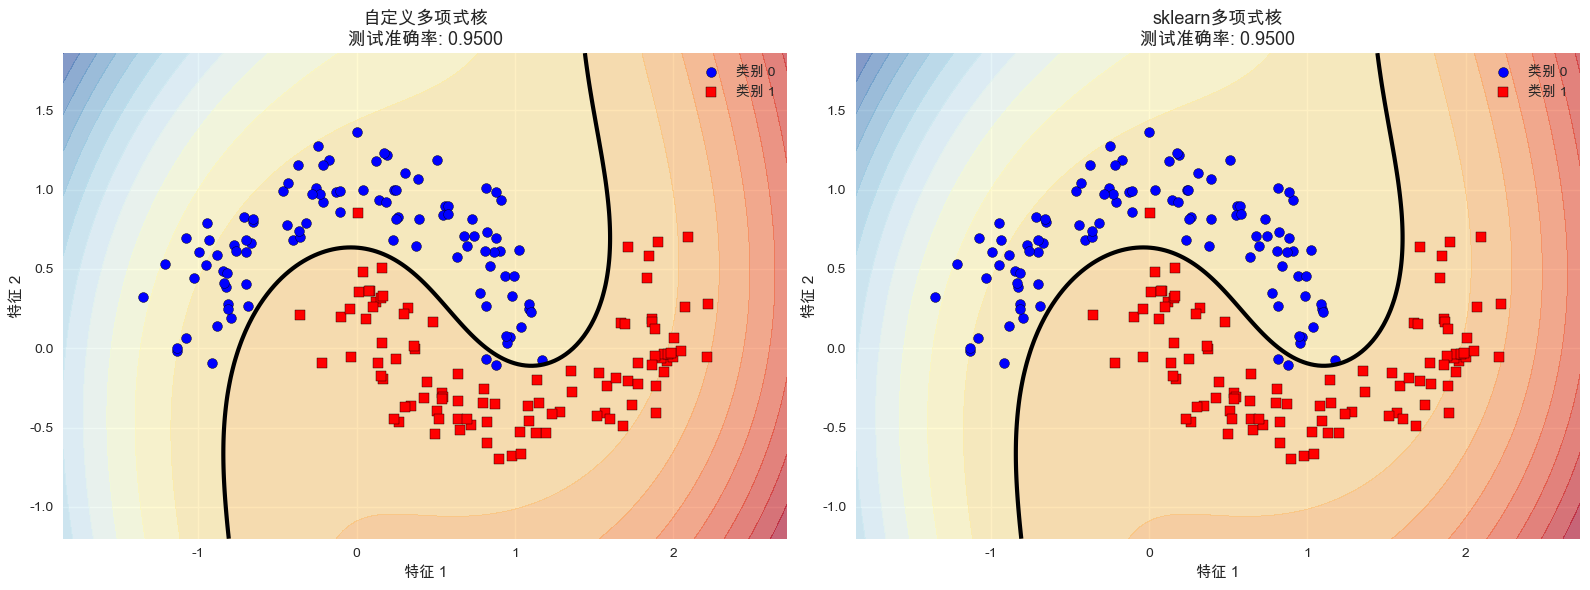


额外实验: 测试不同degree的自定义核
  degree=2: 测试准确率=0.9000, 支持向量数=0
  degree=3: 测试准确率=0.9500, 支持向量数=0
  degree=4: 测试准确率=0.9500, 支持向量数=0
  degree=5: 测试准确率=0.9750, 支持向量数=0

✅ 练习1完成！

关键要点:
  1. 自定义核函数需要计算核矩阵 K(X, Y)
  2. 使用 SVC(kernel="precomputed") 接受核矩阵
  3. 训练时传入 K_train，预测时传入 K_test
  4. 自定义核与sklearn标准核在相同参数下应得到相似结果


In [28]:
### ========== 练习1解答 ==========

# 1. 定义自定义多项式核函数
def custom_polynomial_kernel(X, Y, degree=3, coef0=1):
    """
    自定义多项式核函数: K(x, y) = (x·y + coef0)^degree
    
    参数:
        X: 第一个样本矩阵 (n_samples_1, n_features)
        Y: 第二个样本矩阵 (n_samples_2, n_features)
        degree: 多项式次数
        coef0: 常数项
    
    返回:
        核矩阵 K (n_samples_1, n_samples_2)
    """
    # 计算内积矩阵
    linear_kernel = np.dot(X, Y.T)
    # 应用多项式变换
    kernel_matrix = (linear_kernel + coef0) ** degree
    return kernel_matrix

# 2. 使用月牙形数据集测试自定义核函数
print('='*70)
print('练习1: 自定义核函数')
print('='*70)

# 使用之前的月牙形数据
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42, stratify=y_moons
)

# 3. 计算核矩阵
print('\n步骤1: 计算训练集和测试集的核矩阵...')
K_train = custom_polynomial_kernel(X_train_moons, X_train_moons, degree=3, coef0=1)
K_test = custom_polynomial_kernel(X_test_moons, X_train_moons, degree=3, coef0=1)

print(f'  训练集核矩阵形状: {K_train.shape}')
print(f'  测试集核矩阵形状: {K_test.shape}')

# 4. 使用预计算核训练SVM
print('\n步骤2: 使用自定义核训练SVM...')
svm_custom = SVC(kernel='precomputed', C=1.0, random_state=42)
svm_custom.fit(K_train, y_train_moons)

# 5. 预测和评估
y_pred_train = svm_custom.predict(K_train)
y_pred_test = svm_custom.predict(K_test)

train_acc_custom = accuracy_score(y_train_moons, y_pred_train)
test_acc_custom = accuracy_score(y_test_moons, y_pred_test)

print(f'\n自定义多项式核结果:')
print(f'  训练集准确率: {train_acc_custom:.4f}')
print(f'  测试集准确率: {test_acc_custom:.4f}')
print(f'  支持向量数量: {len(svm_custom.support_vectors_)}')

# 6. 与sklearn标准多项式核对比
print('\n步骤3: 与sklearn标准多项式核对比验证...')
svm_sklearn_poly = SVC(kernel='poly', degree=3, coef0=1, gamma=1.0, C=1.0, random_state=42)
svm_sklearn_poly.fit(X_train_moons, y_train_moons)

train_acc_sklearn = svm_sklearn_poly.score(X_train_moons, y_train_moons)
test_acc_sklearn = svm_sklearn_poly.score(X_test_moons, y_test_moons)

print(f'\nsklearn多项式核结果:')
print(f'  训练集准确率: {train_acc_sklearn:.4f}')
print(f'  测试集准确率: {test_acc_sklearn:.4f}')
print(f'  支持向量数量: {len(svm_sklearn_poly.support_vectors_)}')

# 7. 可视化对比
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 绘制自定义核的决策边界 (需要在完整数据集上重新训练以便可视化)
K_full = custom_polynomial_kernel(X_moons, X_moons, degree=3, coef0=1)
svm_custom_full = SVC(kernel='precomputed', C=1.0, random_state=42)
svm_custom_full.fit(K_full, y_moons)

# 创建网格用于可视化
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# 自定义核的预测
K_grid = custom_polynomial_kernel(grid_points, X_moons, degree=3, coef0=1)
Z_custom = svm_custom_full.decision_function(K_grid).reshape(xx.shape)

axes[0].contourf(xx, yy, Z_custom, levels=20, cmap='RdYlBu_r', alpha=0.6)
axes[0].contour(xx, yy, Z_custom, levels=[0], linewidths=3, colors='black')
axes[0].scatter(X_moons[y_moons==0][:, 0], X_moons[y_moons==0][:, 1],
                c='blue', marker='o', s=50, edgecolors='k', label='类别 0')
axes[0].scatter(X_moons[y_moons==1][:, 0], X_moons[y_moons==1][:, 1],
                c='red', marker='s', s=50, edgecolors='k', label='类别 1')
axes[0].set_title(f'自定义多项式核\n测试准确率: {test_acc_custom:.4f}', fontsize=13)
axes[0].set_xlabel('特征 1', fontsize=11)
axes[0].set_ylabel('特征 2', fontsize=11)
axes[0].legend()

# sklearn标准核的预测
svm_sklearn_full = SVC(kernel='poly', degree=3, coef0=1, gamma=1.0, C=1.0, random_state=42)
svm_sklearn_full.fit(X_moons, y_moons)
Z_sklearn = svm_sklearn_full.decision_function(grid_points).reshape(xx.shape)

axes[1].contourf(xx, yy, Z_sklearn, levels=20, cmap='RdYlBu_r', alpha=0.6)
axes[1].contour(xx, yy, Z_sklearn, levels=[0], linewidths=3, colors='black')
axes[1].scatter(X_moons[y_moons==0][:, 0], X_moons[y_moons==0][:, 1],
                c='blue', marker='o', s=50, edgecolors='k', label='类别 0')
axes[1].scatter(X_moons[y_moons==1][:, 0], X_moons[y_moons==1][:, 1],
                c='red', marker='s', s=50, edgecolors='k', label='类别 1')
axes[1].set_title(f'sklearn多项式核\n测试准确率: {test_acc_sklearn:.4f}', fontsize=13)
axes[1].set_xlabel('特征 1', fontsize=11)
axes[1].set_ylabel('特征 2', fontsize=11)
axes[1].legend()

plt.tight_layout()
plt.show()

# 8. 测试不同的自定义核函数
print('\n' + '='*70)
print('额外实验: 测试不同degree的自定义核')
print('='*70)

degrees = [2, 3, 4, 5]
results = []

for d in degrees:
    K_train_d = custom_polynomial_kernel(X_train_moons, X_train_moons, degree=d, coef0=1)
    K_test_d = custom_polynomial_kernel(X_test_moons, X_train_moons, degree=d, coef0=1)
    
    svm_d = SVC(kernel='precomputed', C=1.0, random_state=42)
    svm_d.fit(K_train_d, y_train_moons)
    
    test_acc = accuracy_score(y_test_moons, svm_d.predict(K_test_d))
    results.append({'degree': d, 'test_accuracy': test_acc, 'n_support': len(svm_d.support_vectors_)})
    print(f'  degree={d}: 测试准确率={test_acc:.4f}, 支持向量数={len(svm_d.support_vectors_)}')

print('\n✅ 练习1完成！')
print('\n关键要点:')
print('  1. 自定义核函数需要计算核矩阵 K(X, Y)')
print('  2. 使用 SVC(kernel="precomputed") 接受核矩阵')
print('  3. 训练时传入 K_train，预测时传入 K_test')
print('  4. 自定义核与sklearn标准核在相同参数下应得到相似结果')

### 练习2: 多分类SVM策略对比

对比One-vs-One和One-vs-Rest多分类策略。

In [ ]:
# TODO: 对比不同的多分类策略
# 提示：
# 1. SVC默认使用One-vs-One
# 2. 使用OneVsRestClassifier包装SVC实现One-vs-Rest
# 3. 对比准确率和训练时间

# from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
# 你的代码...

### 练习3: Pipeline构建

构建一个包含特征缩放和SVM的Pipeline，并进行参数调优。

练习3: Pipeline构建与参数调优

步骤1: 准备数据...
  训练集: (160, 2)
  测试集: (40, 2)
  特征范围: [-1.35, 2.22]

步骤2: 创建Pipeline (StandardScaler + SVC)...
  Pipeline步骤:
    1. scaler: StandardScaler()
    2. svc: SVC()

步骤3: 定义参数网格...
  参数搜索空间:
    svc__C: [0.1, 1, 10, 100]
    svc__gamma: [0.001, 0.01, 0.1, 1, 10]
    总共组合数: 20

步骤4: 创建GridSearchCV...

步骤5: 开始训练（Pipeline自动处理标准化）...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

训练结果
最佳参数: {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
最佳交叉验证得分: 0.9812
测试集准确率: 0.9750

最佳Pipeline:
  Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=1, random_state=42))])

步骤6: 可视化参数搜索结果...


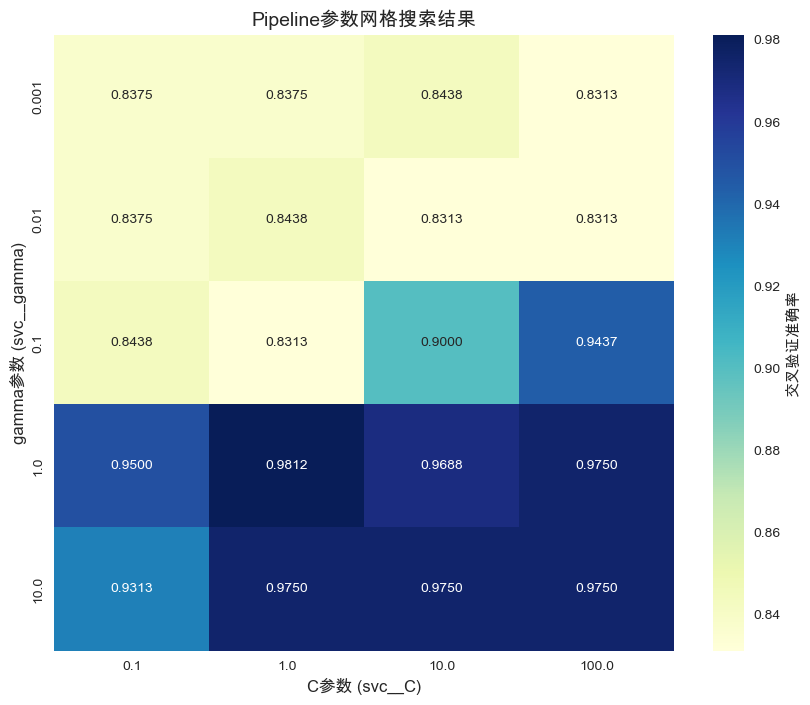


步骤7: 可视化最佳模型决策边界...


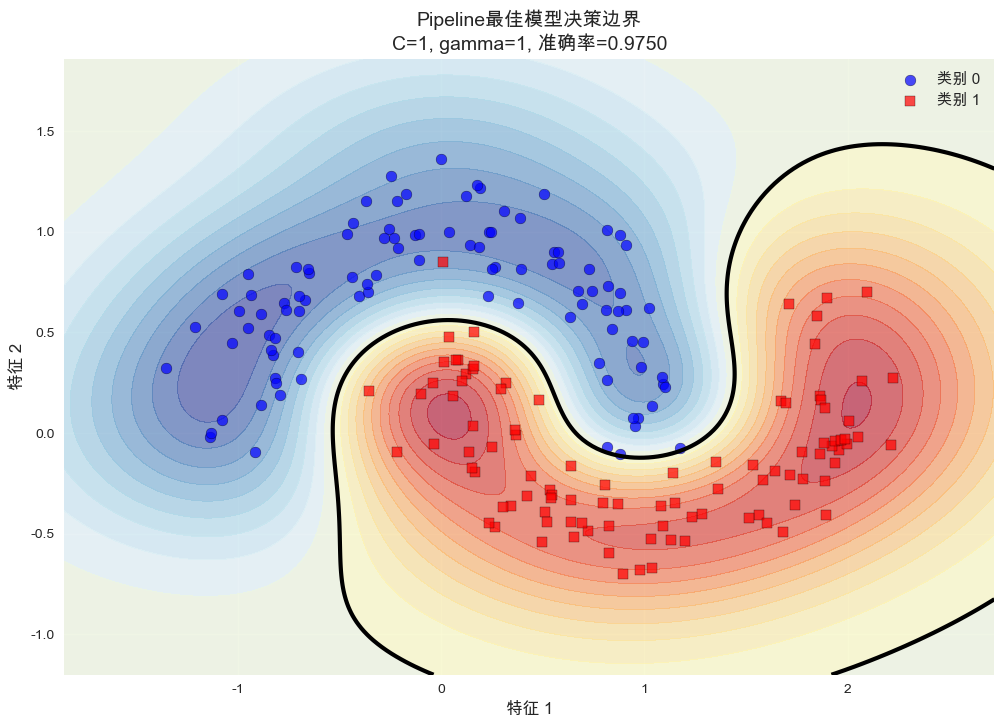


对比: Pipeline vs 手动标准化

方法1: 手动标准化
  最佳参数: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
  测试集准确率: 0.9750

方法2: Pipeline自动化
  最佳参数: C=1, gamma=1
  测试集准确率: 0.9750

Pipeline的优势
✅ 1. 自动化流程: 一次调用完成所有预处理和建模步骤
✅ 2. 避免数据泄露: 在交叉验证中，每个fold独立进行标准化
✅ 3. 代码简洁: 减少重复代码，提高可读性
✅ 4. 易于部署: Pipeline作为单一对象，便于保存和加载
✅ 5. 参数统一管理: 使用"步骤名__参数名"格式统一调参

演示: 为什么需要Pipeline（避免数据泄露）

错误做法: 先标准化全部数据，再交叉验证
  问题: 测试集的信息泄露到训练集中

正确做法: 使用Pipeline，在每个fold内独立标准化
  优势: 真正模拟生产环境，测试集完全未见过

额外实验: 在手写数字数据集上应用Pipeline

在手写数字数据集上训练Pipeline...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

最佳参数: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
最佳交叉验证得分: 0.9805
测试集准确率: 0.9833

✅ 练习3完成！

关键要点:
  1. Pipeline使用步骤: Pipeline([("name1", transformer1), ("name2", estimator)])
  2. 参数命名格式: "步骤名__参数名" (例如: "svc__C")
  3. Pipeline自动处理: fit时在训练集上fit_transform, predict时在测试集上transform
  4. 避免数据泄露: 交叉验证时每个fold独立进行预处理
  5. 简化部署: Pipeline作为单一对象便于保存(pickle/joblib)

完整流程: 原始数据 → Pipeline.fit() → 自动标准化+训练 → Pipeline.predict() → 自动标准化+预测


In [29]:
### ========== 练习3解答 ==========

print('='*70)
print('练习3: Pipeline构建与参数调优')
print('='*70)

# 1. 使用原始的月牙形数据（未标准化）
print('\n步骤1: 准备数据...')
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42, stratify=y_moons
)
print(f'  训练集: {X_train_raw.shape}')
print(f'  测试集: {X_test_raw.shape}')
print(f'  特征范围: [{X_train_raw.min():.2f}, {X_train_raw.max():.2f}]')

# 2. 创建Pipeline
print('\n步骤2: 创建Pipeline (StandardScaler + SVC)...')
pipe = Pipeline([
    ('scaler', StandardScaler()),  # 第一步: 特征标准化
    ('svc', SVC(random_state=42))   # 第二步: SVM分类器
])
print('  Pipeline步骤:')
print('    1. scaler: StandardScaler()')
print('    2. svc: SVC()')

# 3. 定义参数网格（注意使用'svc__'前缀）
print('\n步骤3: 定义参数网格...')
param_grid_pipe = {
    'svc__C': [0.1, 1, 10, 100],           # SVC的C参数
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10],  # SVC的gamma参数
    'svc__kernel': ['rbf']                 # 使用RBF核
}
print('  参数搜索空间:')
print(f'    svc__C: {param_grid_pipe["svc__C"]}')
print(f'    svc__gamma: {param_grid_pipe["svc__gamma"]}')
print(f'    总共组合数: {len(param_grid_pipe["svc__C"]) * len(param_grid_pipe["svc__gamma"])}')

# 4. 创建GridSearchCV
print('\n步骤4: 创建GridSearchCV...')
grid_pipe = GridSearchCV(
    pipe,
    param_grid_pipe,
    cv=5,                  # 5折交叉验证
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

# 5. 训练（注意：直接传入原始数据，Pipeline会自动处理标准化）
print('\n步骤5: 开始训练（Pipeline自动处理标准化）...')
grid_pipe.fit(X_train_raw, y_train_raw)

# 6. 结果分析
print('\n' + '='*70)
print('训练结果')
print('='*70)
print(f'最佳参数: {grid_pipe.best_params_}')
print(f'最佳交叉验证得分: {grid_pipe.best_score_:.4f}')

# 在测试集上评估
test_score_pipe = grid_pipe.score(X_test_raw, y_test_raw)
print(f'测试集准确率: {test_score_pipe:.4f}')

# 获取最佳模型
best_pipe = grid_pipe.best_estimator_
print(f'\n最佳Pipeline:')
print(f'  {best_pipe}')

# 7. 可视化参数搜索结果
print('\n步骤6: 可视化参数搜索结果...')
results_pipe = pd.DataFrame(grid_pipe.cv_results_)

# 创建透视表
pivot_pipe = results_pipe.pivot_table(
    values='mean_test_score',
    index='param_svc__gamma',
    columns='param_svc__C'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_pipe, annot=True, fmt='.4f', cmap='YlGnBu',
            cbar_kws={'label': '交叉验证准确率'})
plt.xlabel('C参数 (svc__C)', fontsize=12)
plt.ylabel('gamma参数 (svc__gamma)', fontsize=12)
plt.title('Pipeline参数网格搜索结果', fontsize=14)
plt.show()

# 8. 可视化最佳Pipeline模型的决策边界
print('\n步骤7: 可视化最佳模型决策边界...')

# 在完整数据集上训练以便可视化
best_pipe_full = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=grid_pipe.best_params_['svc__C'], 
                gamma=grid_pipe.best_params_['svc__gamma'],
                kernel='rbf',
                random_state=42))
])
best_pipe_full.fit(X_moons, y_moons)

# 创建网格
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Pipeline会自动标准化网格点
Z = best_pipe_full.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='black')
plt.scatter(X_moons[y_moons==0][:, 0], X_moons[y_moons==0][:, 1],
            c='blue', marker='o', s=60, alpha=0.7, edgecolors='k', label='类别 0')
plt.scatter(X_moons[y_moons==1][:, 0], X_moons[y_moons==1][:, 1],
            c='red', marker='s', s=60, alpha=0.7, edgecolors='k', label='类别 1')
plt.xlabel('特征 1', fontsize=12)
plt.ylabel('特征 2', fontsize=12)
plt.title(f'Pipeline最佳模型决策边界\nC={grid_pipe.best_params_["svc__C"]}, gamma={grid_pipe.best_params_["svc__gamma"]}, 准确率={test_score_pipe:.4f}', 
          fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# 9. 对比Pipeline vs 手动标准化
print('\n' + '='*70)
print('对比: Pipeline vs 手动标准化')
print('='*70)

# 手动标准化方式
print('\n方法1: 手动标准化')
scaler_manual = StandardScaler()
X_train_manual = scaler_manual.fit_transform(X_train_raw)
X_test_manual = scaler_manual.transform(X_test_raw)

grid_manual = GridSearchCV(
    SVC(random_state=42),
    {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf']},
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_manual.fit(X_train_manual, y_train_raw)
test_score_manual = grid_manual.score(X_test_manual, y_test_raw)

print(f'  最佳参数: {grid_manual.best_params_}')
print(f'  测试集准确率: {test_score_manual:.4f}')

# Pipeline方式（已经训练过）
print('\n方法2: Pipeline自动化')
print(f'  最佳参数: C={grid_pipe.best_params_["svc__C"]}, gamma={grid_pipe.best_params_["svc__gamma"]}')
print(f'  测试集准确率: {test_score_pipe:.4f}')

# 10. Pipeline的优势总结
print('\n' + '='*70)
print('Pipeline的优势')
print('='*70)
print('✅ 1. 自动化流程: 一次调用完成所有预处理和建模步骤')
print('✅ 2. 避免数据泄露: 在交叉验证中，每个fold独立进行标准化')
print('✅ 3. 代码简洁: 减少重复代码，提高可读性')
print('✅ 4. 易于部署: Pipeline作为单一对象，便于保存和加载')
print('✅ 5. 参数统一管理: 使用"步骤名__参数名"格式统一调参')

# 11. 演示数据泄露问题
print('\n' + '='*70)
print('演示: 为什么需要Pipeline（避免数据泄露）')
print('='*70)

print('\n错误做法: 先标准化全部数据，再交叉验证')
print('  问题: 测试集的信息泄露到训练集中')

print('\n正确做法: 使用Pipeline，在每个fold内独立标准化')
print('  优势: 真正模拟生产环境，测试集完全未见过')

# 12. 在手写数字数据集上应用Pipeline
print('\n' + '='*70)
print('额外实验: 在手写数字数据集上应用Pipeline')
print('='*70)

# 使用原始的未标准化手写数字数据
pipe_digits = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])

param_grid_digits_pipe = {
    'svc__C': [1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1],
    'svc__kernel': ['rbf']
}

grid_digits_pipe = GridSearchCV(
    pipe_digits,
    param_grid_digits_pipe,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

print('\n在手写数字数据集上训练Pipeline...')
grid_digits_pipe.fit(X_train_digits, y_train_digits)

print(f'\n最佳参数: {grid_digits_pipe.best_params_}')
print(f'最佳交叉验证得分: {grid_digits_pipe.best_score_:.4f}')
print(f'测试集准确率: {grid_digits_pipe.score(X_test_digits, y_test_digits):.4f}')

print('\n✅ 练习3完成！')
print('\n关键要点:')
print('  1. Pipeline使用步骤: Pipeline([("name1", transformer1), ("name2", estimator)])')
print('  2. 参数命名格式: "步骤名__参数名" (例如: "svc__C")')
print('  3. Pipeline自动处理: fit时在训练集上fit_transform, predict时在测试集上transform')
print('  4. 避免数据泄露: 交叉验证时每个fold独立进行预处理')
print('  5. 简化部署: Pipeline作为单一对象便于保存(pickle/joblib)')
print('\n完整流程: 原始数据 → Pipeline.fit() → 自动标准化+训练 → Pipeline.predict() → 自动标准化+预测')

## 8. 总结

### 8.1 知识点回顾

- ✅ **SVM原理**: 最大间隔分类器
- ✅ **支持向量**: 决定决策边界的关键样本点
- ✅ **硬间隔vs软间隔**: C参数控制容错能力
- ✅ **核技巧**: 处理非线性问题的强大工具
- ✅ **核函数**: Linear, Polynomial, RBF, Sigmoid
- ✅ **参数调优**: C和gamma的影响
- ✅ **GridSearchCV**: 系统化的参数搜索
- ✅ **实战应用**: 手写数字识别

---

### 8.2 SVM的优缺点

**优点：**
- ✅ 在高维空间中非常有效
- ✅ 适合特征数 > 样本数的情况
- ✅ 使用支持向量，内存效率高
- ✅ 通过核函数处理非线性问题
- ✅ 泛化能力强，不易过拟合
- ✅ 理论基础扎实

**缺点：**
- ❌ 训练时间长（尤其是大数据集）
- ❌ 对参数和核函数选择敏感
- ❌ 不直接提供概率估计（需要额外计算）
- ❌ 对噪声和重叠数据敏感
- ❌ 难以解释（黑盒模型）

---

### 8.3 参数选择指南

#### C参数

| C值 | 含义 | 适用场景 |
|-----|------|----------|
| 小 (0.01-0.1) | 软间隔，容忍错误 | 数据有噪声，避免过拟合 |
| 中 (1-10) | 平衡 | 大多数情况 |
| 大 (100+) | 硬间隔，严格分类 | 数据干净，线性可分 |

#### gamma参数（RBF核）

| gamma值 | 含义 | 决策边界 |
|---------|------|----------|
| 小 (0.001-0.01) | 影响范围大 | 平滑、简单 |
| 中 (0.1-1) | 平衡 | 适中 |
| 大 (10+) | 影响范围小 | 复杂、可能过拟合 |

#### 核函数选择

| 核函数 | 适用场景 |
|--------|----------|
| Linear | 数据线性可分，特征数多 |
| RBF | 通用选择，大多数非线性问题 |
| Polynomial | 需要特定多项式决策边界 |
| Sigmoid | 类似神经网络，较少使用 |

---

### 8.4 实践技巧

1. **特征缩放**: SVM对特征尺度敏感，**必须**进行标准化
2. **从RBF核开始**: 如果不确定用哪个核，先试RBF
3. **使用GridSearchCV**: 系统化地搜索最佳参数
4. **交叉验证**: 评估模型的泛化能力
5. **小数据集先试**: SVM在小数据集上训练快，适合快速实验
6. **大数据集考虑替代**: 如果数据量很大(>100k)，考虑线性模型或神经网络

---

### 8.5 SVM vs 其他算法

| 算法 | 优势 | 劣势 |
|------|------|------|
| **SVM** | 高维有效，泛化能力强 | 训练慢，参数调优复杂 |
| **逻辑回归** | 快速，可解释，概率输出 | 只能线性分类 |
| **决策树** | 可解释，无需归一化 | 容易过拟合 |
| **随机森林** | 鲁棒，特征重要性 | 大模型，慢预测 |
| **神经网络** | 强大，自动特征学习 | 需要大数据，难调参 |

---

### 8.6 下一步学习

在下一个notebook中，我们将学习：

- **决策树**: 基于规则的分类器
- **信息增益和基尼系数**: 分裂标准
- **集成学习**: Bagging和Boosting
- **随机森林**: 强大的集成方法
- **XGBoost/LightGBM**: 工业界最流行的算法

---

**恭喜你完成SVM的学习！你现在掌握了强大的非线性分类工具！** 🎉